# Introduction 

YouTube is a widely used and famous online video platform in the world today. YouTube has a list of trending videos that is updated constantly. Analyzing these trending videos can give content creators greater perspective and knowledge for increasing their popularity and brand of their channels. Companies and businesses using social media and
digital platform can also use this analysis to boost their growth in business by publishing videos or sponsoring appropriate channels at right time.

## About Trending Videos on YouTube

Trending page in YouTube helps viewers to see
what’s happening in their region, which event or videos are
people watching the most. Videos with wide range of
viewers that find the video interesting are shown in
Trending section. Like a new movie trailer or new song from
known artist, some Trending videos are predictable. Other
videos are surprising, and based on time, event and day of
that video. Trending displays same list of Trending videos to
all users in each country, it does not show any personalized
videos. The list of videos in Trending section updates for
every 15 minutes. With each update, videos can stay in
the same position in the list, Move up or down. Users can't
pay to have their videos to shown in trending results that
means trending videos are never sponsored.

![](https://imgur.com/FuCZnJh.jpg)

The dataset that we will use is obtained from Kaggle here. It contains data about trending videos for many countries. Here we will analyze INDIA trending videos.

__The main goal of the analysis is to find interesting facts and patterns by exploring the data and by using effective visualizations.__

### Importing the required libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as mc
from matplotlib import ticker
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import datetime
import wordcloud
import json
import re
import requests
import os
import requests

In [49]:
IN_df = pd.read_csv('IN_youtube_trending_data.csv')
category = pd.read_json("IN_category_id.json")
category.head(3)

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."


In [50]:
k = open("IN_category_id.json").read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i+1:Category_list[i] for i in range(len(Category_list))}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 3: 'Music',
 4: 'Pets & Animals',
 5: 'Sports',
 6: 'Short Movies',
 7: 'Travel & Events',
 8: 'Gaming',
 9: 'Videoblogging',
 10: 'People & Blogs',
 11: 'Comedy',
 12: 'Entertainment',
 13: 'News & Politics',
 14: 'Howto & Style',
 15: 'Education',
 16: 'Science & Technology',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

Now, let's see some information about our datase

### Getting a feel of the dataset

Let's See how our dataset by displaying its first few rows and last few rows.

In [51]:
IN_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64863,r1gl-VaTfxo,Saying I LOVE YOU to PARENTS | Social Experime...,2021-07-16T12:30:14Z,UC8K9ptYhFDTtnUDoz95WJQw,FunPataka,24,2021-07-20T00:00:00Z,Saying I LOVE YOU to PARENTS|Latest Telugu Pra...,210032,23034,136,2094,https://i.ytimg.com/vi/r1gl-VaTfxo/default.jpg,False,False,Download the Erice AppAndroid: https://play.go...
64864,y8IEZ25JQKA,Work At Home - Start Your YouTube Channel And ...,2021-07-18T05:10:00Z,UCRGl2gA9X6BXqOvNL2jePtw,Mahatmaji Technical,27,2021-07-20T00:00:00Z,Start Your YouTube Channel And Instagram Page|...,132038,8053,326,1434,https://i.ytimg.com/vi/y8IEZ25JQKA/default.jpg,False,False,Digital Marketing Course की Complete details क...
64865,ahas8c_YkBk,Udaariyaan | उड़ारियां | Ep. 108 | Jasmine's ...,2021-07-18T07:00:00Z,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,24,2021-07-20T00:00:00Z,colors tv serials all|colors tv promo|colors t...,1125106,16329,617,262,https://i.ytimg.com/vi/ahas8c_YkBk/default.jpg,False,False,To download the Voot app please click on the l...
64866,iihEibhdRAU,SSC GD - 2021 बंपर भर्ती - 25271 पद | Official...,2021-07-18T15:14:41Z,UC8XBsRz_R8CqweUyHxf6awg,SSC MAKER,27,2021-07-20T00:00:00Z,SSC GD - 2021 बंपर भर्ती - 25271 पद | Official...,63798,5450,201,1122,https://i.ytimg.com/vi/iihEibhdRAU/default.jpg,False,False,SSC GD - 2021 बंपर भर्ती - 25271 पद | Official...


__THE DATA IS COLLECTED FROM THE DATE `12 AUG 2020` TO `20 JULY 2021` which is 343 days almost a huge data has been collected. Each day there are almost 200 videos have been listed.__

In [6]:
IN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64868 entries, 0 to 64867
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           64868 non-null  object
 1   title              64868 non-null  object
 2   publishedAt        64868 non-null  object
 3   channelId          64868 non-null  object
 4   channelTitle       64867 non-null  object
 5   categoryId         64868 non-null  int64 
 6   trending_date      64868 non-null  object
 7   tags               64868 non-null  object
 8   view_count         64868 non-null  int64 
 9   likes              64868 non-null  int64 
 10  dislikes           64868 non-null  int64 
 11  comment_count      64868 non-null  int64 
 12  thumbnail_link     64868 non-null  object
 13  comments_disabled  64868 non-null  bool  
 14  ratings_disabled   64868 non-null  bool  
 15  description        63479 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

🧐 __Observations__ 🧐

- There are 64868 rows and 16 columns in the dataset
- Qualitative Variables are title,channelId,channelTitle,categoryId are most important attributes for our analysis.
- Quantitative Variables are PublishedAt,trending_date,view_count,likes, dislikes,comment_count.
- Columns tags,thumbnail_link,comments_disabled,ratings_disabled have not particular use in our analysis.

In [7]:
IN_df.shape

(64868, 16)

__The number of unique videos and channels in the table__

In [8]:
IN_df['video_id'].unique().shape[0]

18414

Let's add all the categories to dataframe.

In [9]:
# Categories are stored in key value pairs.
# In order to fetch category of each video we are writing function for it.

def fetch_video_category(value):
    return categories[value]

In [10]:
# category ID is applied to all the data frames using the above function.

IN_df["Video_Category"] = IN_df.categoryId.apply(fetch_video_category)

In [11]:
IN_df.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Video_Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Family
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,People & Blogs
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,People & Blogs


In [12]:
IN_df.Video_Category.value_counts()

Family              26718
People & Blogs      10866
Documentary          7352
Drama                5315
Thriller             2591
Foreign              2452
Horror               2365
Movies               2314
Classics             1579
Film & Animation     1270
Sci-Fi/Fantasy       1265
Action/Adventure      394
Autos & Vehicles      343
Shorts                 31
Education              13
Name: Video_Category, dtype: int64

There are 31 categories but major of the trending videos fall to only 15 catogories listed above. Some category videos can't make to trending page due to lack of interest of people.

### Data Cleaning

In [13]:
IN_df.dropna(subset=['view_count'], how='any',inplace=True)

We don't need data like "channelId", "thumbnail_link", "ratings_disabled", "comments_disabled" so we are deleting those columns.

In [14]:
# Remove unnecessary columns for further analysis
IN_df.drop(["channelId","thumbnail_link","ratings_disabled","comments_disabled"], inplace=True, axis=1)

We have added categories to the dataframe by fetching so we don't need Category ID's also so we are dropping that value also.

In [15]:
IN_df.drop(["categoryId"], inplace=True, axis=1)

In [16]:
IN_df.shape[0]

64868

## Let's start Analysing the Data

In [17]:
IN_df.describe()

,view_count,likes,dislikes,comment_count
count,6.486800e+04,6.486800e+04,6.486800e+04,6.486800e+04
mean,2.851676e+06,1.379124e+05,6.936331e+03,1.437916e+04
std,7.924646e+06,4.572400e+05,1.413814e+05,1.226996e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.105755e+05,1.412925e+04,5.200000e+02,6.820000e+02
50%,9.648670e+05,3.806500e+04,1.358000e+03,2.033500e+03
75%,2.357036e+06,1.040118e+05,3.685000e+03,6.481500e+03
max,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


- The average views for Trending Videos is 2,851,676 and median view for the Trending videos is 9,648,670  which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
- The Maximum View for Trending Video is 264,407,400 and maximum like is 16,115,240.
- The average number of likes of a trending video is 1,37,912, while the average number of dislikes is 6,936.
- The average number of comments a video had when video became trending was 14,379 and median is 2,033.

How useful are the observations above? Do they really represent the data? Let's examine more.



### Maximum view count of a Trending Video

In [18]:
IN_df['view_count'].max()

264407389

In [32]:
IN_df[IN_df['video_id'] == 'Qah9sSIXJqk'].head(1).transpose()

,27368
video_id,Qah9sSIXJqk
title,KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...
publishedAt,2021-01-07T15:57:35Z
channelTitle,Hombale Films
trending_date,2021-01-08T00:00:00Z
tags,Hombale films|hombale|hombale films kannada|ho...
view_count,70972929
likes,4376290
dislikes,16498
comment_count,338100


In [19]:
IN_df[IN_df['view_count'] == IN_df['view_count'].max()].transpose()

,52057
video_id,WMweEpGlu_U
title,BTS (방탄소년단) 'Butter' Official MV
publishedAt,2021-05-21T03:46:13Z
channelTitle,HYBE LABELS
trending_date,2021-05-30T00:00:00Z
tags,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄
view_count,264407389
likes,16021542
dislikes,150990
comment_count,6738565


### Trending Videos with Most Views

Note that the following list contains unique videos because the table might contain multiple records for the same video in case the video was on the trending list for more than one day.

In [21]:
IN_df_maxView = IN_df.sort_values(by='view_count', ascending=False).drop_duplicates(subset=['video_id'])
IN_df_maxView.head(6)

,video_id,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,Video_Category
52057,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021542,150990,6738565,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,People & Blogs
3619,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,2020-08-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,253995993,16115240,756696,6249727,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,People & Blogs
64049,DUwlGduupRI,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,2021-07-06T09:30:02Z,DM - Desi Melodies,2021-07-16T00:00:00Z,filhall 2|Filhaal 2|Filhaal|mohabbat|Mohabbat ...,202091414,3997842,122432,327015,"If 'Filhall' touched your heart, ‘Filhaal 2 - ...",People & Blogs
4735,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,2020-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795683,879354,2736021,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,People & Blogs
64265,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-09T03:59:12Z,HYBE LABELS,2021-07-17T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,162473728,12225971,107873,2802727,BTS (방탄소년단) 'Permission to Dance' Official MVC...,People & Blogs
29476,Qah9sSIXJqk,KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...,2021-01-07T15:57:35Z,Hombale Films,2021-01-18T00:00:00Z,Hombale films|hombale|hombale films kannada|ho...,156704924,7699743,73171,670632,"Here We Go, Glimpse Into An Empire Called KGF ...",Family


IN_df_minViews stores the data of a video entering into trending videos for the first time

In [20]:
IN_df_minView = IN_df.sort_values(by='view_count', ascending= True).drop_duplicates(subset=['video_id'])

In [21]:
IN_df_minView.head(3)

,video_id,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,Video_Category
46895,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21T11:00:14Z,GoogleDoodles,2021-04-23T00:00:00Z,[None],0,0,0,0,This year’s annual Earth Day Doodle highlights...,Film & Animation
17317,hHvXxuB2pNU,IPL 2020 | IPL 2020 Important 40 Question | Dr...,2020-11-11T00:30:05Z,Study In Hindi,2020-11-11T00:00:00Z,study in hindi|IPL 2020 IPL 2020 Important 40 ...,15402,2099,30,84,#IPL_2020 #Mumbai_Won_2020IPL #40_MCQsIPL 2020...,Sci-Fi/Fantasy
2760,tNSmXwfTrAk,FDC & SDC ಪರೀಕ್ಷೆಗಳ ಕುರಿತು ಹೊರಬಂತು ಪ್ರಮುಖವಾದ ಮ...,2020-08-25T12:06:38Z,ಉದ್ಯೋಗ ಮಿತ್ರ,2020-08-26T00:00:00Z,[None],16775,785,47,85,https://t.me/udyogamitrakarnataka,Sci-Fi/Fantasy


Why `Google Doodle channel's` Earth Day 2021 Doodle has No Views?

Google Doodle Videos are linked from the Google homepage, meaning they almost certainly have tons of Views. (One estimate from analytics firm Similar Web put the number of desktop visits at around 40 billions per day). That may explain why comments and the thumbs up-thumbs down counter is disabled — Google doesn’t want to see its Doodle videos stormed by people with negative comments or political reactions.

Not only this video they have hidden view count for most of the videos in the GOOGLE DOODLE's Channel.

### View Count Distribution

In [22]:
IN_df_maxView[IN_df_maxView['view_count'] < 5_000_000].shape[0] / IN_df_maxView.shape[0] * 100

91.18062343868796

__91% Trending Videos have less than 5_000_000 Views.__

In [23]:
IN_df_maxView[IN_df_maxView['view_count'] < 10_000_000].shape[0] / IN_df_maxView.shape[0] * 100

95.89985880308461

__Most of the Trending Videos have Views less than 10 Million.__

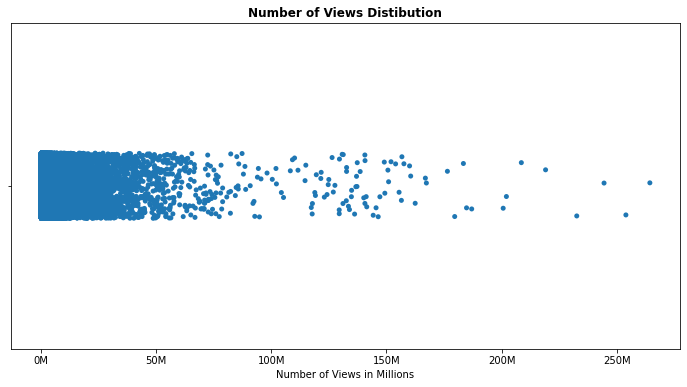

In [24]:
plt.figure(figsize=(12,6))

ax = sns.stripplot(x=IN_df["view_count"]);
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_formatter(formatter)

ax.set(xlabel='Number of Views in Millions') ;

ax.set_title('Number of Views Distibution' , fontdict= { 'fontsize': 12, 'fontweight':'bold'});

- Most of the Trending videos have less than 50M.
- Few videos have in the range of 50M to 150M
- Very few videos have more than 150M View Count in the Trending Section

From the above we can infer that

* If we have we count 50M then the probability of getting into the Trending Section will be more.

### How many views a video has when first appearing on the Trending List ?

We mentioned earlier that there were many videos that appeared on the trending list on more than one day. We now want to consider the first appearance only of each video. We want to know how many views a trending video had when it became trending for the first time.

Let's see the distribution of the number of views of trending videos when first appearing on the trending list:

In [25]:
cdf = IN_df.drop_duplicates(subset=['video_id'])

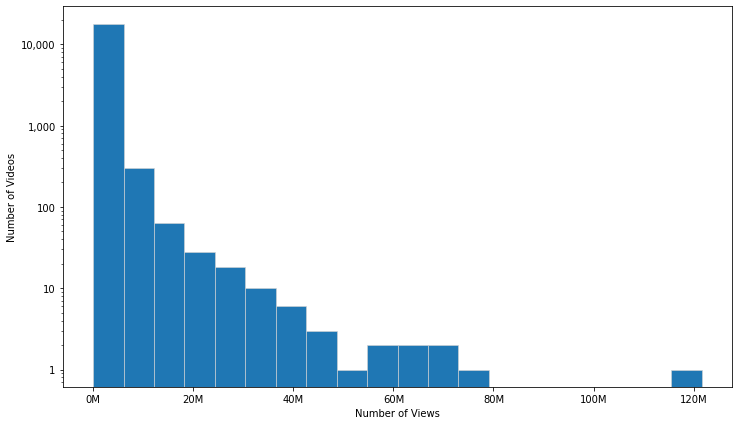

In [26]:
ax = cdf['view_count'].plot(kind='hist', figsize=(12,7), bins=20, logy=True, lw=0.6, ec='lightgray')

def millions(x, pos):
    return '{}M'.format(int(x / 1000000))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions));

ax.set_xlabel('Number of Views')
ax.set_ylabel("Number of Videos");

Notice that the y-axis is log scaled. It is 10, 100, 1000… not 10, 20, 30…

We can see that there is one video that became trending when it had ~120 million views. We can see another one that became trending when it had ~75 million views. But most of the videos became trending when they had less than ~30 million views.

In fact:

- 91% of trending videos became trending for the first time when they had less than 5,000,000 views.
- The minimum number of views a video had when it first became trending was 15,402 views.

Let's analyse View Count, Likes, Dislikes, Comments from the above data.

In [27]:
# Create another subdataframe to analyse Category-wise Likes, Dislikes, Views and Comments.
IN_df_View_Analysis = IN_df_maxView.groupby('Video_Category')["view_count"].sum().reset_index()

# Add Likes to the video Category.
IN_df_Like = IN_df_maxView.groupby('Video_Category')["likes"].sum().reset_index()
IN_df_View_Analysis["Likes"] = IN_df_Like.likes

# Add Dislikes to the above Category.
IN_df_Dislike = IN_df_maxView.groupby('Video_Category')["dislikes"].sum().reset_index()
IN_df_View_Analysis["Dislikes"] = IN_df_Dislike.dislikes

# Let's add Comment Count also to that Category.
IN_df_Comments = IN_df_maxView.groupby('Video_Category')["comment_count"].sum().reset_index()
IN_df_View_Analysis["comment_count"] = IN_df_Comments.comment_count

In [28]:
IN_df_View_Analysis

,Video_Category,view_count,Likes,Dislikes,comment_count
0,Action/Adventure,77628257,6183631,193305,803338
1,Autos & Vehicles,78368287,3502645,110824,142733
2,Classics,1029710482,78370821,1916737,4924207
3,Documentary,3151356954,148812372,5544394,10781593
4,Drama,2433689451,178903340,4711127,10511853
5,Education,1465643,52477,1337,2454
6,Family,16476014373,528143641,34133663,33991694
7,Film & Animation,762482296,21577753,2836034,1564279
8,Foreign,652452227,13565040,2928228,1682658
9,Horror,676155501,27672072,1475706,1883804


### Categories Analysis based on Views, Likes, Dislikes and Comments

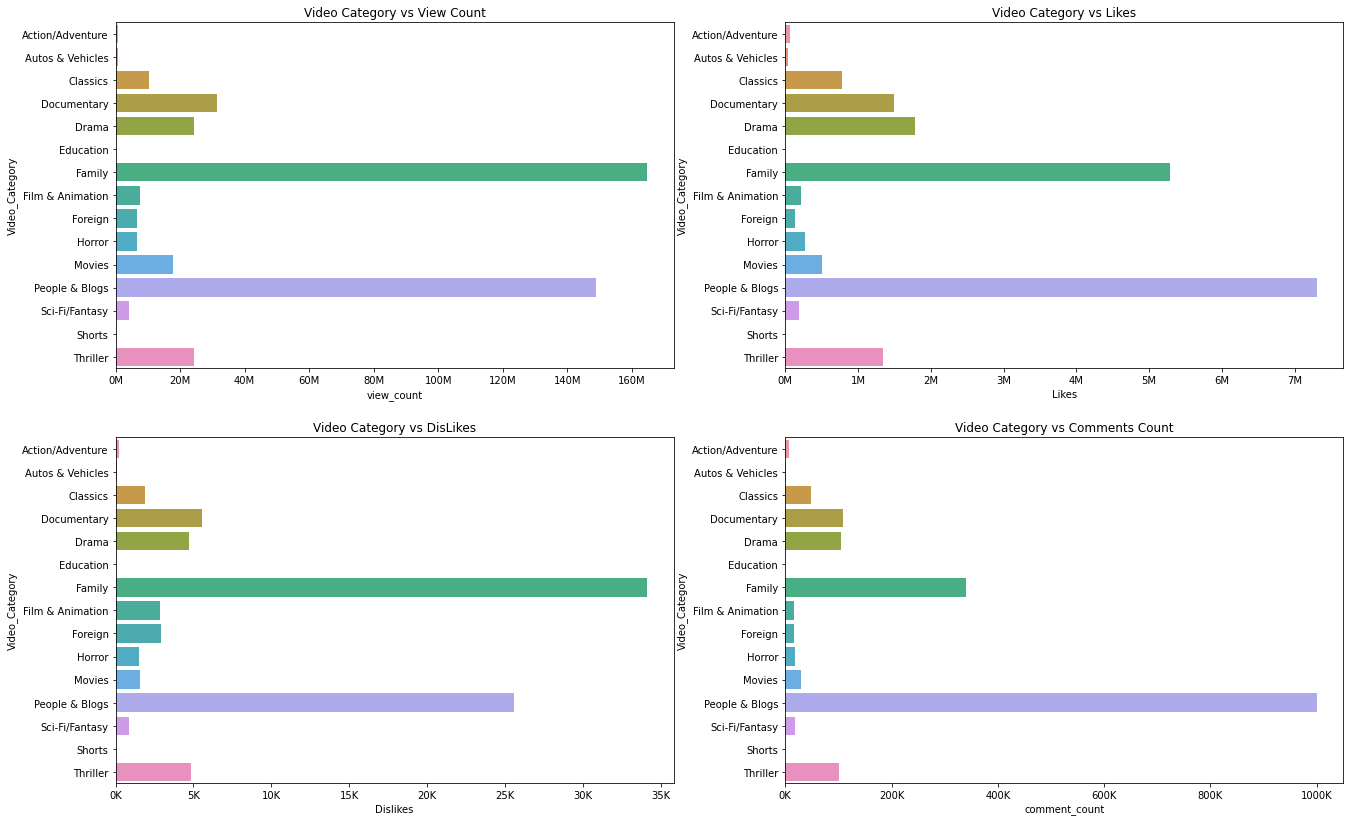

In [29]:
#size of the plot
fig, axes = plt.subplots(2, 2, figsize=(22, 14))

# Category vs View Count
a = sns.barplot(x = 'view_count', y = 'Video_Category', data = IN_df_View_Analysis,ax=axes[0,0])
axes[0,0].set_title('Video Category vs View Count')
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e8))
a.xaxis.set_major_formatter(formatter)

# Category vs Likes
b = sns.barplot(y='Video_Category', x='Likes',data = IN_df_View_Analysis,ax=axes[0,1])
axes[0,1].set_title('Video Category vs Likes')
b.xaxis.set_major_formatter(formatter)

# Category vs Dislikes
c = sns.barplot(y='Video_Category', x='Dislikes',data = IN_df_View_Analysis,ax=axes[1,0])
axes[1,0].set_title('Video Category vs DisLikes')
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x/1e6))
c.xaxis.set_major_formatter(formatter)

# Category vs Comment Count
d = sns.barplot(y='Video_Category', x='comment_count',data = IN_df_View_Analysis,ax=axes[1,1])
axes[1,1].set_title('Video Category vs Comments Count')
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x/1e5))
d.xaxis.set_major_formatter(formatter)

The Above Data infers:

- All the videos uploaded are categorised to 15 Types.
- Out of all, People & Blogs and Family has highest view count, Likes, Dislikes and comment count.
- Viewers seems to be less interested in Education, Adventure and Vehicles realted videos on YouTube.

But is that right way of analysis?

- Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
- Does highest views say that the public are highly interested in watching those Category videos?
- Let's dive deep further to understand even more

Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let me create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [30]:
# Response can be either likes or dislikes.
IN_df_View_Analysis["Response_Percentage"] = ( IN_df_View_Analysis.Likes + 
                                              IN_df_View_Analysis.Dislikes) * 100 / IN_df_View_Analysis.view_count 


IN_df_View_Analysis

,Video_Category,view_count,Likes,Dislikes,comment_count,Response_Percentage
0,Action/Adventure,77628257,6183631,193305,803338,8.214710
1,Autos & Vehicles,78368287,3502645,110824,142733,4.610882
2,Classics,1029710482,78370821,1916737,4924207,7.797100
3,Documentary,3151356954,148812372,5544394,10781593,4.898105
4,Drama,2433689451,178903340,4711127,10511853,7.544696
5,Education,1465643,52477,1337,2454,3.671699
6,Family,16476014373,528143641,34133663,33991694,3.412702
7,Film & Animation,762482296,21577753,2836034,1564279,3.201882
8,Foreign,652452227,13565040,2928228,1682658,2.527889
9,Horror,676155501,27672072,1475706,1883804,4.310810


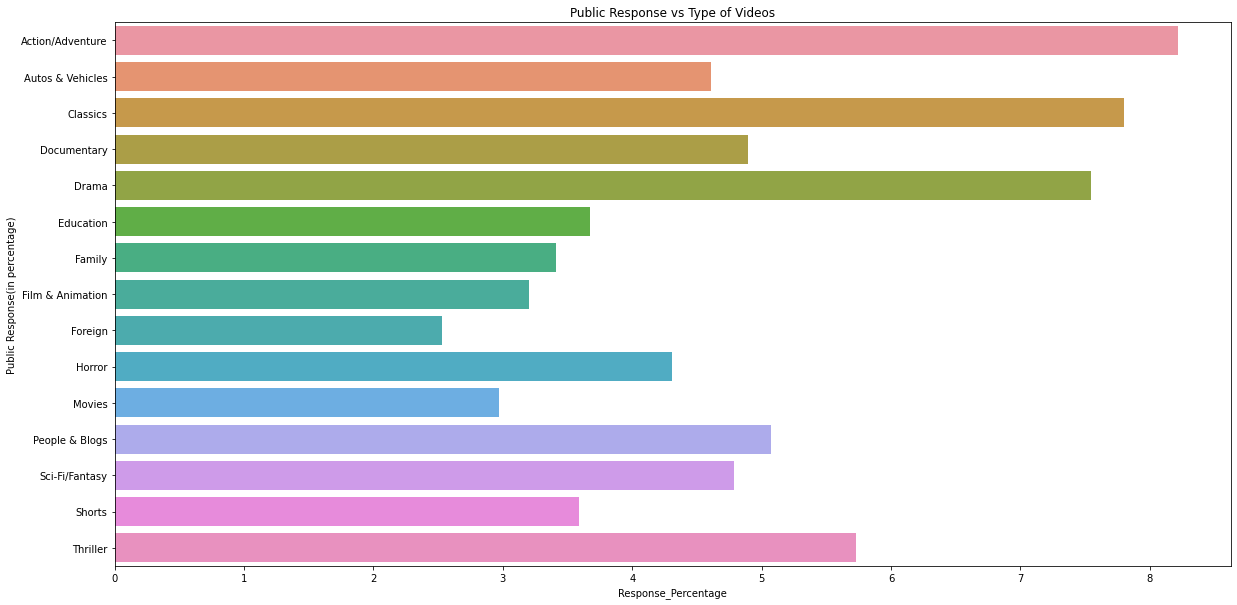

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")

sns.barplot(y=IN_df_View_Analysis.Video_Category, x=IN_df_View_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)");

So now, We can see that Viewers are highly reacting to Action/Adventure , Classics, Drama Videos. Let's randomly see what those videos are

If people are more respndent towards Action/Adventure, Classics, Drama Videos, then they might be more commenting in the comment section.

Let's check which are the videos under "Action/Adventure", "Classics", "Drama" category.

In [47]:
IN_df_maxView[IN_df.Video_Category.isin(["Action/Adventure","Classics","Drama"])].sample(3).transpose()

,20056,23284,15207
video_id,jrov59bmiNk,OgUrv34bPEs,bFNML7poNZc
title,Dubki Dubka | the mridul | Nitin,LINKEDIN PROFILES ARE THE WORST,35 ലക്ഷത്തിന്റെ ബൈക്ക്‌ വാങ്ങി😍/ Honda Goldwin...
publishedAt,2020-11-19T12:30:07Z,2020-12-10T16:27:47Z,2020-10-29T04:30:01Z
channelTitle,The MriDul,Tanmay Bhat,Mallu Traveler
trending_date,2020-11-27T00:00:00Z,2020-12-15T00:00:00Z,2020-10-31T00:00:00Z
tags,the mridul|the mridul new video|pragati|pragat...,AIB|Stand Up Comedian|Jokes|Funny|Vlog|Indian ...,mallu traveler|travel vlogs|mallu traveller|ke...
view_count,4088983,1058478,898549
likes,127353,157482,87247
dislikes,8663,5300,2342
comment_count,6574,4188,9134


### Distribution of Title Lengths

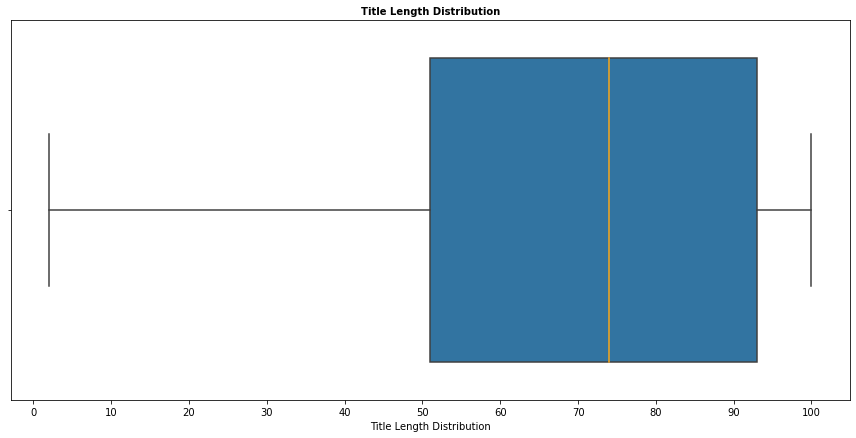

In [33]:
title_lengths = IN_df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(title_lengths,  medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.tight_layout()

ax.set(xlabel='Title Length Distribution');

ax.set_title('Title Length Distribution' , fontdict= { 'fontsize': 10, 'fontweight':'bold'});

In [34]:
title_lengths.describe()

count    64868.000000
mean        70.411913
std         23.508939
min          2.000000
25%         51.000000
50%         74.000000
75%         93.000000
max        100.000000
Name: title, dtype: float64

- The mean length of the Trending Videos Title is '70', if your video has length in this range the chances of you getting in the list of trending will have more probability.
- The max length of Title in the Trending Videos is 100 and min length is 2.

Let's check some example which are having title length of 2 and 100.

In [35]:
IN_df[title_lengths == 2].head(2)

,video_id,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,Video_Category
47881,1AFM-ylRtgY,🥰😘,2021-04-28T16:30:16Z,Danish & Sana,2021-04-29T00:00:00Z,[None],340090,10594,952,174,NaN,Family
48067,1AFM-ylRtgY,🥰😘,2021-04-28T16:30:16Z,Danish & Sana,2021-04-30T00:00:00Z,[None],544051,13310,2816,392,NaN,Family


In [36]:
IN_df[title_lengths == 100].head(2)

,video_id,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,Video_Category
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,VYRLOriginals,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,VYRL Originals brings to you ‘Baarish’ - the b...,People & Blogs
9,XM4Kd1gQ7Ek,Jatti Jaandi (Official Video) | Kambi Ft. Mahi...,2020-08-12T02:24:34Z,Gringo Entertainments,2020-08-12T00:00:00Z,kambi|jatti jaandi|mahi sharma|kambi new song|...,1466612,97192,2276,3311,Gringo Entertainments presents new track Jatti...,People & Blogs


### Correlations of Trending Videos


Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a heatmap


In [37]:
IN_df['title_length'] = IN_df['title'].str.len()
IN_df['desc_length'] = IN_df['description'].str.len()

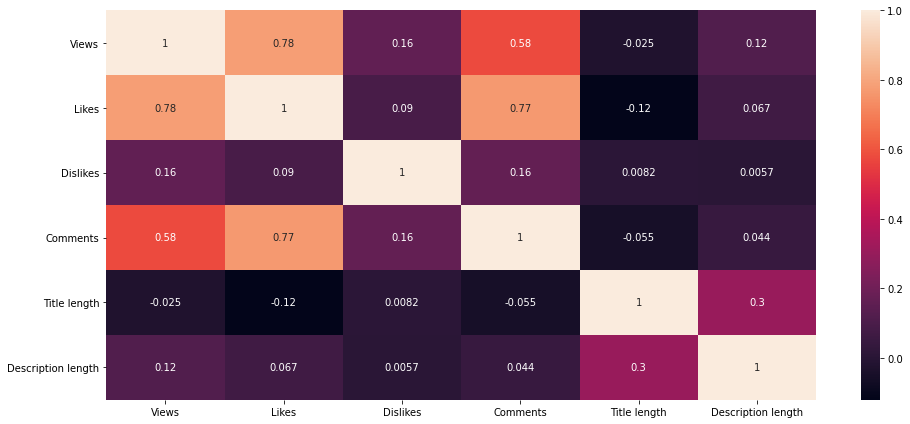

In [38]:
heatmap_columns = ['view_count', 'likes', 'dislikes', 'comment_count', 
                    'title_length', 'desc_length', ]

h_labels = ['Views', 'Likes', 'Dislikes', 'Comments', 
            'Title length', 'Description length']

fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(IN_df[heatmap_columns].corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels)
plt.tight_layout()

In this heatmap, lighter colors indicate higher positive correlation and darker colors indicate lower positive correlation (and sometimes negative correlation). The highest possible positive correlation is 1 and the highest possible negative correlation (which is the lowest possible positive correlation) is -1.

We can see that there is a high positive correlation (0.78) between views and likes. Also there is more correlation between Likes and Comments(0.77). This means that they tend to increase together in trending videos. We can also notice a significant positive correlation (0.58) between comments and views. Also, there is a significant positive correlation between comments and likes and between comments and dislikes.

As there is no correlation between Dislkes and Comments, hence the Pearson Correlation value between Comments & Dislikes is near to 0 which is 0.16

## Channel Analysis

Let's start analysing Channel-wise : Total Views, Likes, Dislikes and Total No of Comments.

In [39]:
# Let's create another dataframe with Channels list and add view counts to it.
# Each channels videos view count's total calculated and appended to Channels dataframe.
IN_df_Channel = IN_df_maxView.groupby('channelTitle')["view_count"].sum().reset_index()

# Add Likes also to it.
IN_df_Like = IN_df_maxView.groupby('channelTitle')["likes"].sum().reset_index()
IN_df_Channel["Likes"] = IN_df_Like.likes

# Add Dislikes and add total sum to it.
IN_df_Dislike = IN_df_maxView.groupby('channelTitle')["dislikes"].sum().reset_index()
IN_df_Channel["Dislikes"] = IN_df_Dislike.dislikes


# Add Comments also to it so that analyses becomes more beautiful.
IN_df_Comments = IN_df_maxView.groupby('channelTitle')["comment_count"].sum().reset_index()
IN_df_Channel["Comments"] = IN_df_Comments.comment_count

In [40]:
IN_df_Channel.shape[0]

2287

Since we have taken data from IN_df_maxView it will not contain duplicates. 
There are totally `2287` channels recorded on the trending page in the period from '12 August 2020' to '20 July 2021'. Most of the time Trending videos will be featured from these channels itself. We shall analyse total how many videos from each channel and time taken to appear on the trending page from the uploaded time.

The Channels with the maximum view counts.

In [41]:
IN_df_Channel.sort_values( 'view_count', ascending=False)

,channelTitle,view_count,Likes,Dislikes,Comments
1810,T-Series,1866263933,51981858,2906599,3965910
2086,Vijay Television,1398944204,27892544,672609,2370270
382,Colors TV,731420701,9451697,452578,215582
238,BLACKPINK,702317466,62026802,1618570,8565641
694,HYBE LABELS,676508031,60358171,469774,14411467
...,...,...,...,...,...
794,J-Series India,28205,344,30,25
204,AstroSage.com,23634,580,29,18
2285,ಉದ್ಯೋಗ ಮಿತ್ರ,23332,884,59,91
1762,Study In Hindi,22103,3035,48,116


From the above analysis we can infer that

- "T-Series" has the maximum view count, Likes, Dislikes, Comments which is the most popular channel with '188 Million' of Subscribers.

- Next Vijay Television, Colors TV, BLACKPINK are the most popular channels in INDIA which have more Trending Views, Likes and Dislikes too.

- GoogleDoodle doesn't show it's Views, Likes, Dislikes and Number of Comments to it.



### Most No of times in Trending Video

Some videos don’t appear on the trending list for only one day, nor for two days. There are some videos that appeared on the trending list for 19 days. The following table shows the videos that appeared on the trending list the most. There is 1 video that appeared for 30 days on the trending list.

In [42]:
# Creating a dictionary of Number of days in Trending based on the 'video_id''
NoOfDaysInTrending = dict(IN_df.groupby('video_id')['view_count'].count())

In [43]:
# Creating function to fetch the Number of days in Trending data.
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

In [44]:
# Adding Number of days in Trending to the DataFrame MaxView which are stored in the dictionary format.
IN_df_maxView["times_in_trending"] = IN_df_maxView.video_id.apply(fetch_video_times)

Let's try to find the Channels that have their videos in trending for most of the times.

In [45]:
IN_df_trend_video_tt = IN_df_maxView.sort_values('times_in_trending', ascending=False).iloc[:10,:]
IN_df_trend_video_tt

,video_id,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,Video_Category,times_in_trending
58680,y_RHQ4mBDKA,"Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...",2021-06-08T05:30:44Z,T-Series,2021-06-17T00:00:00Z,Bedardi Se Pyaar Ka|Bedardi Se Pyaar Ka song|B...,46351646,1585497,44771,77470,Gulshan Kumar & T-Series presents Bhushan Kuma...,People & Blogs,19
56622,KVh4KtUSW3A,"Baarish Ban Jaana (Official Video) Payal Dev, ...",2021-06-03T05:30:20Z,VYRLOriginals,2021-06-12T00:00:00Z,vyrl originals|vyrl original|hina khan|shaheer...,46199357,984341,33052,110202,VYRL Originals brings to you yet another monso...,People & Blogs,18
56632,pYDdDIdiSFY,KFC Style Crispy Chicken Fry🍗 #Jamamasjid #del...,2021-06-02T07:25:15Z,INDIA EAT MANIA,2021-06-12T00:00:00Z,[None],29970151,636668,43574,5711,#kfcchicken #jamamasjidchicken #chickenfry #ja...,Family,18
54976,LtLJRNBHOKc,Online Parent Teacher Meeting | Ashish Chanchlani,2021-05-29T08:35:32Z,ashish chanchlani vines,2021-06-07T00:00:00Z,ashish chanchlani|ashish chanchlani vines|ashi...,20645862,2311665,31993,110663,"Download India's simplest Bitcoin app, CoinDCX...",Drama,17
54983,Hjj9nrjvpZo,She thought she pranked me 😂🤷‍♂️ #shorts,2021-05-28T09:30:01Z,Suyash Vlogs,2021-06-07T00:00:00Z,[None],42645272,691428,60115,1764,NaN,Family,17
58637,nFjVlf2r9_Q,Badshah - Paani Paani | Jacqueline Fernandez |...,2021-06-09T06:30:27Z,Saregama Music,2021-06-17T00:00:00Z,paani paani|paani paani badshah|badshah new so...,76252340,1417028,153022,86156,Badshah x Jacqueline Fernandez x Aastha Gill a...,People & Blogs,16
57399,oiBif8SefIg,LOCKDOWN WITH COUSIN ( Episode -2 ) || Rachit ...,2021-06-06T04:07:00Z,Rachit Rojha,2021-06-14T00:00:00Z,rachit rojha|rachit rojha new video|lockdown w...,7987529,243058,19726,20730,Lockdown with Cousin comedy. ( Episode - 2 )--...,Family,16
55515,2OtgYcd83Qg,"Jagame Thandhiram | Trailer | Dhanush, Aishwar...",2021-06-01T04:30:00Z,Netflix India,2021-06-09T00:00:00Z,netflix india|netflix|netflix shows|JagameThan...,11209237,571223,11929,27549,Sara-vedi oda Suruli ready!The film tells the ...,Family,16
56254,AzOvsmpQVKM,Jubin Nautiyal : Kabira (कबीर दोहे) | Raaj Aas...,2021-06-03T03:30:35Z,T-Series,2021-06-11T00:00:00Z,कबीर के दोहे|सन्त कबीर|कबीरदास|poet|popular do...,18970641,1363032,21272,80926,Gulshan Kumar & T-Series presents Bhushan Kuma...,People & Blogs,16
56996,GbwpvjAEZv0,Great Khali's Instagram is The Funniest - Try ...,2021-06-05T07:00:02Z,Triggered Insaan,2021-06-13T00:00:00Z,triggered insaan|live insaan|great khali|great...,10226184,1034148,28653,61954,We Tried Not to Laugh at The Great Khali's Ins...,Drama,16


Let's plot the above table

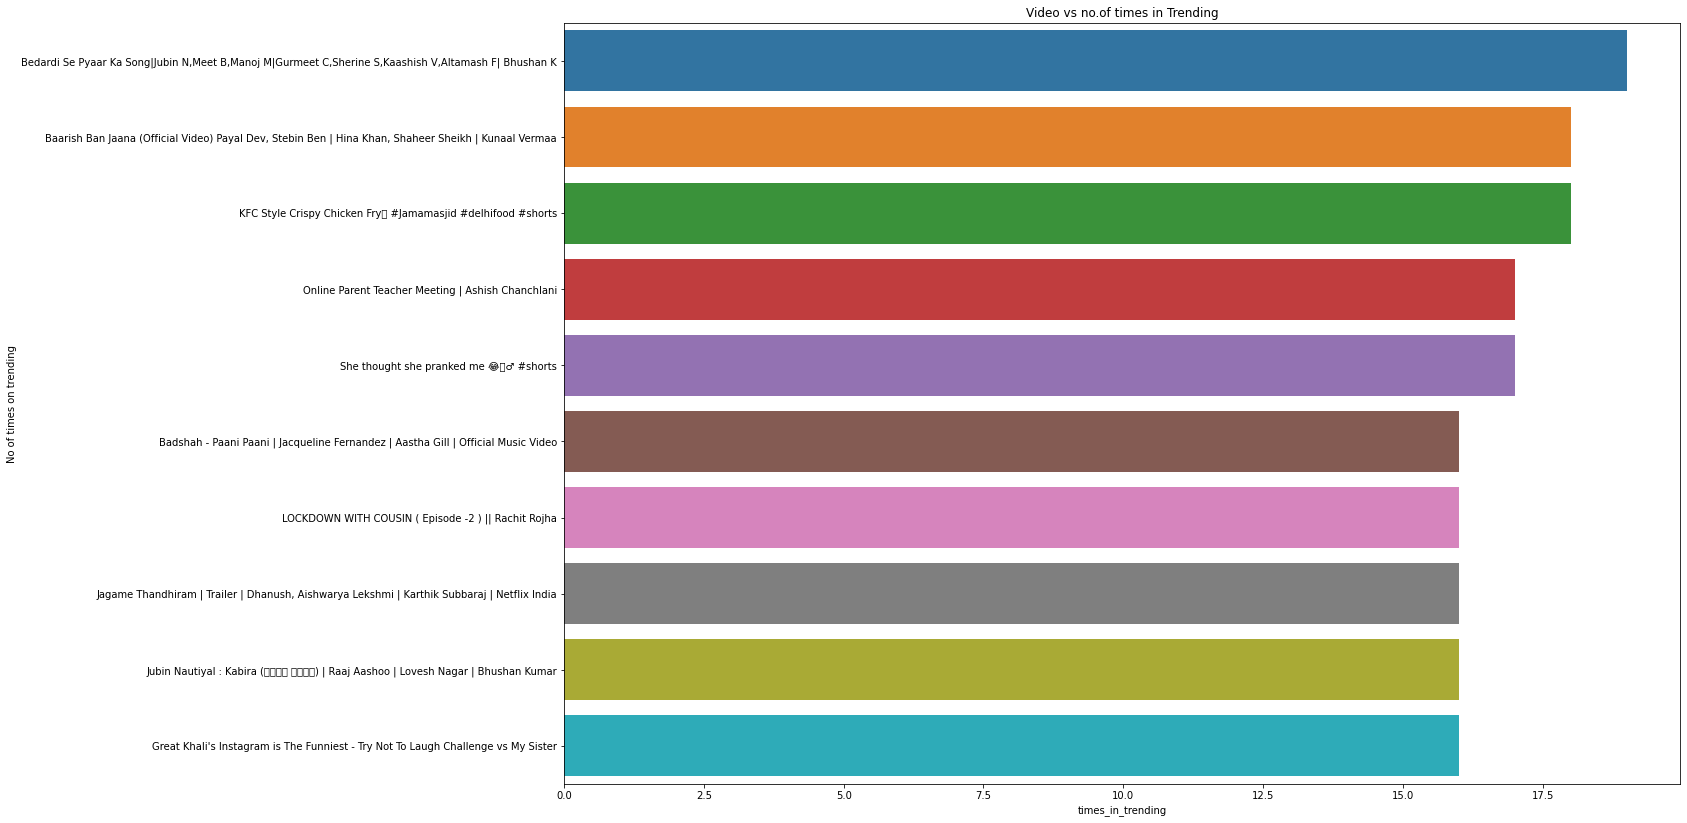

In [46]:
#Top 10 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,14))

# Add title
plt.title("Video vs no.of times in Trending")


sns.barplot(y=IN_df_trend_video_tt.title, x=IN_df_trend_video_tt.times_in_trending)
#sns.violinplot(x = IN_df_trend_video_tt.channelTitle, y = IN_df_minView.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("No of times on trending");

### Channel vs Number of Times in Trending

In [47]:
# gives all the channels in which videos appeared on trending most of the time. 
IN_df_Channel_Trending = IN_df_maxView.groupby("channelTitle")["times_in_trending"].sum().reset_index()

# channel category vides
IN_df_Channel_Trending["Majority_Videos_Category_Type"] = IN_df_maxView.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]

# top 30 channels with more trending videos.
IN_df_Channel_Trending = IN_df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]

Which channels produced more trending videos? 


In [48]:
IN_df_Channel_Trending

,channelTitle,times_in_trending,Majority_Videos_Category_Type
2086,Vijay Television,962,Family
382,Colors TV,948,Family
2174,ZEE5,721,Family
201,Asianet,642,Family
1712,Sony SAB,579,Family
396,Crazy XYZ,545,Thriller
1855,Taarak Mehta Ka Ooltah Chashmah,440,Family
1810,T-Series,423,People & Blogs
587,Flowers Comedy,393,Family
381,Colors Rishtey,345,Family


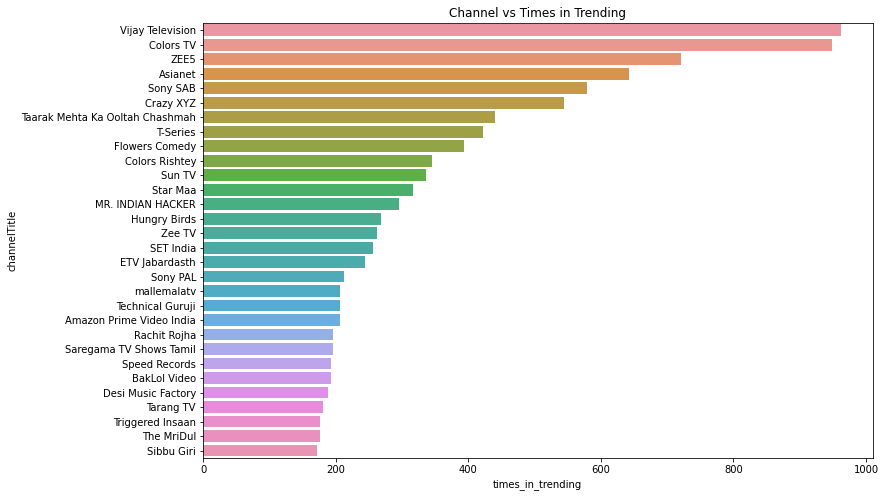

In [49]:
plt.figure(figsize=(12,8))

plt.title('Channel vs Times in Trending')
sns.barplot(y=IN_df_Channel_Trending.channelTitle, x=IN_df_Channel_Trending.times_in_trending);

`Vijay Television` is the most number of times has appered on trending, it has appered 962 times on the trending page.  `Colors TV` is the second highest trending ,serially the list goes `ZEE5`, `Asianet`, `Sony SAB` and `Crazy XYZ` channel videos have featured more than '500' times  on Trending Page.

Let's analyse Category of the Videos Uploaded of Top Channels which are in Trending

### Category vs Total No. of Times in Trending

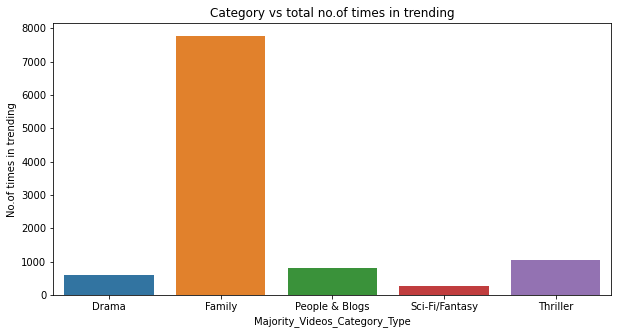

In [50]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
Category_Trending = IN_df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("No.of times in trending");

__From the above graph we can infer that people tend to watch more videos related to 'Family' less in 'Drama' , 'Thriller', 'People & Blogs' and 'Sci-Fi'__

### Days taken for Trending

In [51]:
# convert Trending Date 'object' to 'datetime' Class.
IN_df_minView["JoinedTrending"] = pd.to_datetime(IN_df_minView.trending_date.str.split(',\s*').str[0])

# convert Published Date 'object' to 'datetime' Class. 
IN_df_minView["UploadedTime"] = pd.to_datetime(IN_df_minView.publishedAt.str.split(',\s*').str[0])

# calculted how many days it took to appear on Trending.
IN_df_minView["DaysTakenToBeOnTrending"] = (IN_df_minView["JoinedTrending"] - IN_df_minView["UploadedTime"]).dt.days

In [52]:
# Days taken for Trending.
IN_df_minView['DaysTakenToBeOnTrending'] = IN_df_minView['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)

In [53]:
# we can see the section Days taken to be on Trending
IN_df_minView.sample(2)

,video_id,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
15321,MZWina8plDk,FAMILY PACK | Karikku | Comedy,2020-11-01T06:24:06Z,Karikku,2020-11-01T00:00:00Z,karikku|malayalam|funny|comedy|webseries|lolan...,3550584,524898,4051,29525,#Sleepyhead #Mattress #Unboxing #karikku #come...,Drama,2020-11-01 00:00:00+00:00,2020-11-01 06:24:06+00:00,0
8881,XHDXxR4xO5o,Senthoora Poove | 28th September to 2nd Octobe...,2020-09-27T06:52:25Z,Vijay Television,2020-09-27T00:00:00Z,Senthoora Poove|Ranjith|New Fiction|New Serial...,645178,8160,207,181,#SenthooraPoove #Ranjith #NewFiction #VijayTV ...,Family,2020-09-27 00:00:00+00:00,2020-09-27 06:52:25+00:00,0


In [54]:
# How much percent of videos became trending within 24hour

IN_df_minView[IN_df_minView['DaysTakenToBeOnTrending'] == 0]['title'].count()

16781

In [55]:
percent_of_vid = IN_df_minView[IN_df_minView['DaysTakenToBeOnTrending'] == 0]['title'].count() *100 / IN_df_minView.shape[0]
percent_of_vid

91.1317475833605

__91% of videos came on trending page within 24 hours from the uploaded time.__

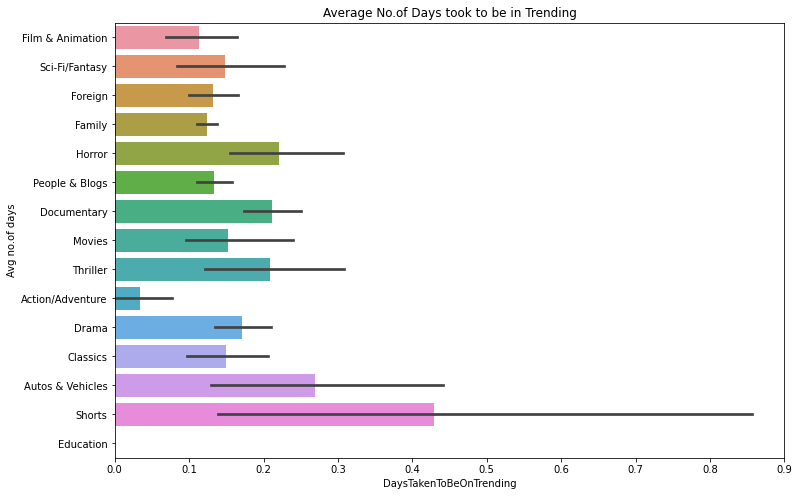

In [56]:
# Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(12,8))

# Add title
plt.title("Average No.of Days took to be in Trending")
plt.xlabel

sns.barplot(y = IN_df_minView.Video_Category, x = IN_df_minView.DaysTakenToBeOnTrending)
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days");

- Nower days "YT Shorts" are becoming so popular shorts videos are becoming Trending within 1 day.

### Trending Videos that have more Dislikes than their Likes when first appearing on the Trending list

In [57]:
cdf = IN_df.drop_duplicates(subset=['video_id'])

cdf['net_dislikes'] = (cdf['dislikes'] - cdf['likes'])

cdf[cdf['net_dislikes'] >= 0].sort_values(by='net_dislikes', ascending=False).head(3)

,video_id,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,Video_Category,title_length,desc_length,net_dislikes
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,Three Streams. Three Stories. One Journey. Sta...,Family,92,889.0,3754484
3852,OExRBGfhLKc,Prime Minister Narendra Modi's Mann Ki Baat wi...,2020-08-30T06:04:48Z,Bharatiya Janata Party,2020-09-01T00:00:00Z,[None],4672634,250682,968263,187080,Subscribe Now - http://bit.ly/2ofH4S4 Stay Upd...,Foreign,72,257.0,717581
2274,1RwQlgS4zQI,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,2020-08-24T04:26:50Z,Zee Studios,2020-08-24T00:00:00Z,Ishaan Khattar|Ananya Panday|New Movies|Films|...,1038748,41745,355820,31916,"भंकस bandh, शानपट्टी shuru! Meter down karle a...",Film & Animation,75,246.0,314075


- `Sadak 2 | Official Trailer` has more Dislikes than Likes.

Till now we have analysed Views, Likes, Dislikes, Comments and their Channel. Now we shall see most common words in title and description.

## Most Common Words

### Let's check Most Common Words in Title

Are there some words that occur in trending video titles more than others? To find out the answer, I analyzed the titles of all trending videos and counted the occurrences of each word in those titles.

In [58]:
stopwords = set(STOPWORDS)

In [59]:
text1 = " ".join(title for title in IN_df.title)

In [60]:
word_cloud2 = WordCloud(width = 1900, height = 1080,
                        collocations = False, background_color = "#fdf6e3",
                        stopwords = stopwords).generate(text1)

"a", "to", "and" ,"in". Such words are called stop words. Stop words are words that are very common in a given language (English in our case). To get better results, we will exclude stop words from our analysis.

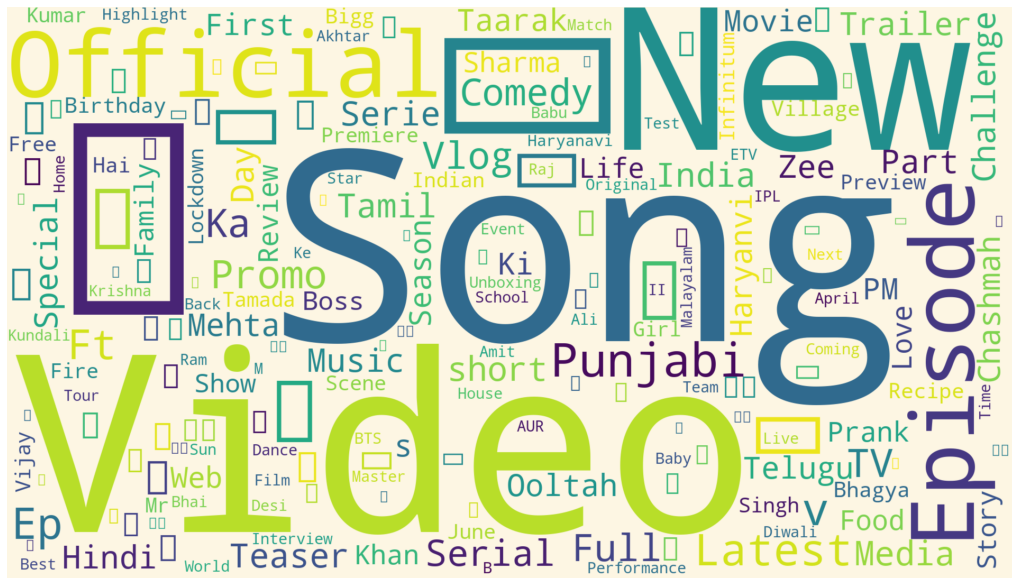

In [61]:
plt.figure(figsize = (18, 12), facecolor = None)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

You can see that the most common word is “Song”,"Video", "official", "Comedy" and "New" because it is the largest. You can also see large “symbol ▯”, 


### Most Common words in Video Description

The following word cloud shows the most common words in the descriptions of trending videos similar to what was done for video titles. This word cloud shows the most common words after excluding stop words.

In [62]:
text2 = " ".join([x for x in IN_df['description'] if not pd.isnull(x)])

In [63]:
word_cloud2 = WordCloud(width=1920, height=1080,
                        collocations = False, background_color = "#362636",
                        stopwords = stopwords).generate(text2)

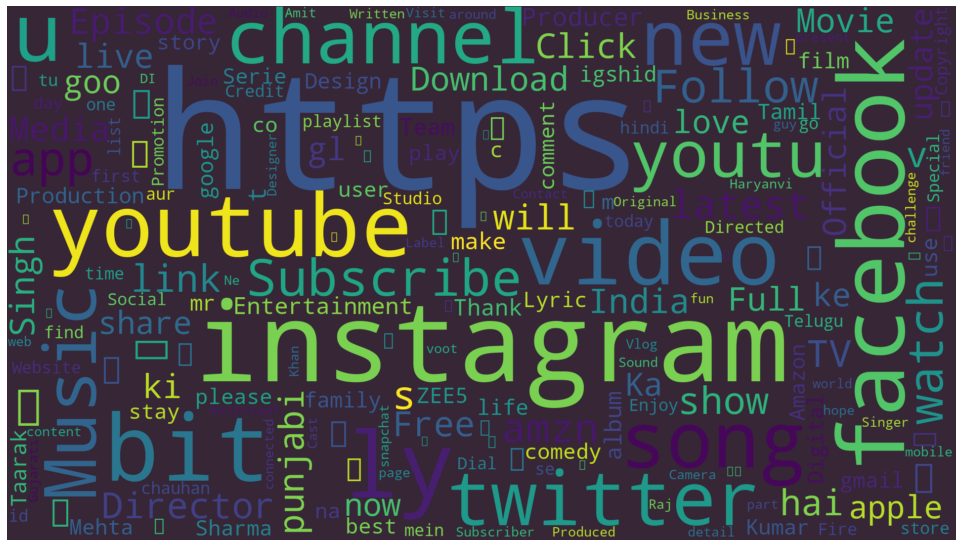

In [64]:
plt.figure(figsize = (17, 12), facecolor = None)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

We can see that “https”, “instagram”, “facebook”, "youtube" and “Subcribe” are among the most common words. This indicates that trending videos descriptions contain many URLs. We also can see that names of social media platforms like “instagram”, “twitter”, and “facebook” are quite common also. This indicates that trending videos descriptions contain links to these platforms.


- Most of the time people tend to give their social media account links like Instagram, Facebook so their link appears more in description.

# Conclusion

- We analyzed a dataset that contains information about YouTube trending videos for 343 days from the date `12 August 2020` to `20 July 2021` It contains 64868 video entries.


- T-Series is the channel that produced most Viewed in Trending Video, it is India's largest music record label.


- While a video might stay on the trending list for one day or less, there is a video "Bedardi Se Pyaar Ka Song" which appeared on Trending for 19 days and there are other two videos which appeared on trending for 18 days.


- BTS's song 'Butter' Official MV is the most viewed, liked, and commented video. 


- " Sadak 2 | Official Trailer " is the most disliked Video than Likes in the Trending Videos.


- 91% Trending Videos have less than 5,000,000 Views.


- Some videos appeared on the trending list when they had only around 30,000 views.


- Family and People & Blogs category videos has the most Views, Likes and Dislikes.


- We can see that Viewers are highly reacting to Action/Adventure , Classics, Drama category Videos.


- There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.


- Words like “official”, “video”, “Song”, “episode”, “teaser”, “music”, “Punjabi”, “latest”, and “Promo” were among the most common in trending video titles. So if you include these words in your title, does that increase trending chances?


- Minimum of 2 letters and the Maximum of 100 letters are used in Title Length, most trending videos have title lengths between 50 and 90 characters.


- A lot of trending videos put social media links in their descriptions.

In this post, we saw the results of analyzing YouTube trending videos . For me, the results were interesting and insightful. Hope they were the same for you.


## References

- https://www.kaggle.com/rsrishav/youtube-trending-video-dataset(link to the dataset)
- Matplotlib & Seaborn tutorial: https://jovian.ml/aakashns/python-matplotlib-data-visualization
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html


## Future Work

- Check Thumbnails also, most used keywords in thumbnails.
- Most used color in Thumbnails.
- Analysis of Tags and Hashtags
- At which day of the week and which hour of the day has more trending videos.